In [232]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

In [233]:
data=pd.read_csv('transactions.csv')

In [234]:
data['Original Description'].head()

0    Credit Card Advance MSU SPARTYS BRODY EAST LAN...
1    Credit Card Advance MSU SPARTYS BRODY EAST LAN...
2    Credit Card Advance MSU SPARTYS BRODY EAST LAN...
3    Credit Card Advance MSU SPARTYS BRODY EAST LAN...
4    Credit Card Advance AMAZON MKTPLACE PMTS AMZN....
Name: Original Description, dtype: object

In [235]:
data[['Transaction Type','Account Name']].head()

,Transaction Type,Account Name
0,debit,50 Platinum Visa
1,debit,50 Platinum Visa
2,debit,50 Platinum Visa
3,debit,50 Platinum Visa
4,debit,50 Platinum Visa


In [236]:
iscoffee=data['Category'] =='Coffee Shops'
coffee = data[iscoffee].copy()

In [237]:
coffee.head(3)

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name
84,6/25/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,2.01,debit,Coffee Shops,50 Platinum Visa
117,7/18/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,1.00,debit,Coffee Shops,50 Platinum Visa
122,7/21/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,1.00,debit,Coffee Shops,50 Platinum Visa


In [238]:
lst_weekday=[]
M_D = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for t in coffee['Date']:
    t= t.split('/')
    day = int(t[0])
    month =int(t[1])
    year =int(t[2])
    lst_weekday.append(M_D[dt.date(year,day,month).weekday()])
coffee['Weekday'] = lst_weekday
coffee.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Weekday
84,6/25/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,2.01,debit,Coffee Shops,50 Platinum Visa,Thu
117,7/18/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,1.00,debit,Coffee Shops,50 Platinum Visa,Sat
122,7/21/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,1.00,debit,Coffee Shops,50 Platinum Visa,Tue
124,7/23/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,1.00,debit,Coffee Shops,50 Platinum Visa,Thu
146,8/12/2015,Tim Horton's,Credit Card Advance TIM HORTONS #913781 DETROI...,3.22,debit,Coffee Shops,50 Platinum Visa,Wed


In [253]:
x =coffee.groupby(['Weekday']).sum()

In [254]:
coffee.describe()

,Amount
count,247.000000
mean,9.265182
std,6.304787
min,0.150000
25%,4.705000
50%,10.000000
75%,10.000000
max,50.000000


ValueError: x and y must have same first dimension, but have shapes (247,) and (7, 1)

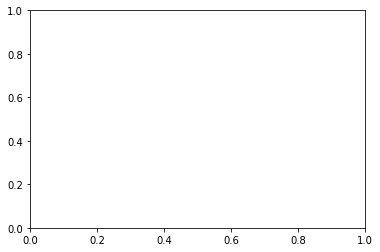

In [255]:
y =x
x = coffee['Amount']

plt.plot(x,y)
plt.show()